<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/EjercicioAbulonDivideEntrenarProbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


# **Importación de Librerías**

## **Librerias Panda y Visualización**

In [2]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

import missingno as msno
import numpy as np

sns.set_theme()


## **Librerias Machine Learning**

In [3]:
# LIBRERIAS MACHINE LEARNING

from sklearn                 import metrics                # Metricas (Matriz de Confunsión)

from sklearn.linear_model    import LogisticRegression     # Regresión Logistica
from sklearn.linear_model    import LinearRegression       # Regresión Lineal

from sklearn.preprocessing   import StandardScaler         # Standarización

from sklearn.neighbors       import KNeighborsClassifier   # Knn como clasificador
from sklearn.neighbors       import KNeighborsRegressor    # Knn como Regresor

from sklearn.tree            import DecisionTreeClassifier # Arboles de Decisión Clasificador
from sklearn.tree            import DecisionTreeRegressor  # Arboles de Decisión Regresor

from sklearn.ensemble        import BaggingClassifier      # Bagging and pasting
from sklearn.ensemble        import RandomForestClassifier # Bosques aleatorios (Random Forests)
from sklearn.model_selection import GridSearchCV           # Grid Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV     # Para Pruebas Random

from sklearn.model_selection import train_test_split       # Para dividir las pruebas

from sklearn                 import tree                   # Grficar Arboles

# PARA OBTENER METRICAS
from sklearn.metrics         import mean_absolute_error    # Error absoluto medio (MAE)
from sklearn.metrics         import mean_squared_error     # Error cuadrático medio (MSE) y Raíz del error cuadrático medio (RMSE)
from sklearn.metrics         import r2_score               # Determinar el r2 score

# **Carga de Datos**

In [4]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df




In [5]:
filename = 'abalone.csv'    

df = CargaDatos(filename)

# **Información de los Datos**


In [6]:
df.head() 

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# **Verificar Datos Nulos isna**

In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# **Verificar Datos Nulos (Null)**

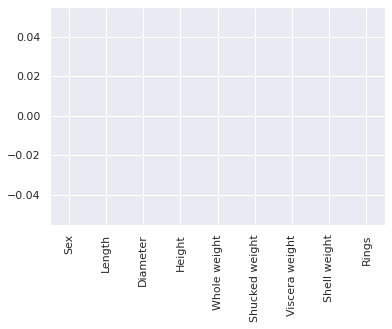

In [10]:
df.isnull().sum().plot.bar();

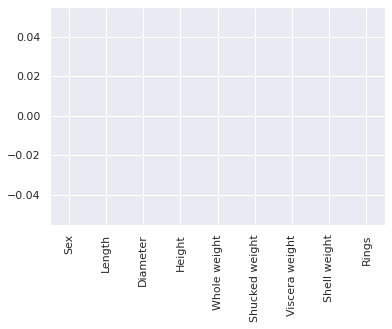

In [11]:
df.isnull().sum().plot.bar();

# **Verificar Datos Duplicados**

In [12]:
df.duplicated().sum()

0

# **Gráfica de Campos.** 

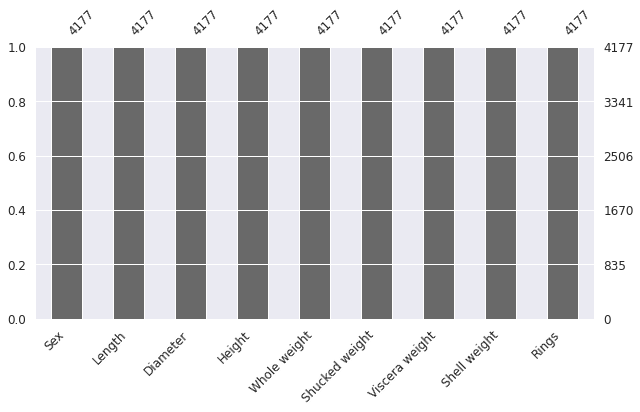

In [13]:
msno.bar(df, figsize=(10,5), fontsize=12);

In [14]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [15]:
df.shape

(4177, 9)

# **Regresión Lineal**

In [16]:
def MetodoLinearRegression(X,y, fit_intercept = False, divideDatosEntreno = True):
  
  if divideDatosEntreno == True:
    print(f"Dividiendo Datos {divideDatosEntreno}\n")
    X_train, X_test , y_train , y_test = train_test_split(X , y, test_size=0.3, random_state=42 ) # Divide los datos para pruebas

  else:
    print(f"Sin Dividir Datos {divideDatosEntreno}\n")
    X_train = X
    y_train = y    
    X_test  = X
    y_test  = y    

  #############################
  #   INICIO REGRESION        #
  #############################

  #Crea una instancia de regresión lineal
  
  reg = LinearRegression(fit_intercept = fit_intercept) # ( fit_intercept=True ) = Aplica solo para datos que tienen un comportamiento más líneal.

  # Entrenando el Modeo para Clasificación
  reg.fit(X_train, y_train)  

  #Realizando la Regresión
  y_pred    = reg.predict(X_test) 

  #############################
  #         METRICAS          #
  #############################

  score     = round( reg.score(X_train, y_train) , 4 )  * 100.0
  coef      = reg.coef_
  intercept = reg.intercept_
  r2 = r2_score(y_test, y_pred)

  #mae  = mean_absolute_error(y_test, y_pred)
  #mse  = mean_squared_error(y_test, y_pred)
  #rmse = mean_squared_error(y_test, y_pred, squared=False)
  
  print(f" score         = {score} \n")
  print(f" fit_intercept = {fit_intercept}")
  print(f" coef_         = {coef}")
  print(f" intercept     = {intercept}")
  print(f" r2            = {r2} \n")  
  
  #print(f" mae  {mae}                       ")
  #print(f" mse  {mse}                       ")
  #print(f" rmse {rmse}                      ")
  

  #Realizando la Regresión con X
  y_predX    = reg.predict(X) 
  
  #matrizconf = metrics.confusion_matrix(y_test.values, y_pred)

  return y_pred , y_predX, X_test, y_test, score

# **KNN**

## **Estandarizar datos**

In [17]:
def MetodoEstandarizarDatos(X):
  
  #############################
  #   INICIO STANDARIZACION   #
  #############################

  scaler = StandardScaler()
  
  # Ajusta en X (asumiendo que tu matriz de características es una matriz NumPy)
  scaler.fit(X)
  
  # Transform X
  X = scaler.transform(X);
  
  return X

**KNN como Regresión**

In [18]:
def MetodoKNNRegresion(X , y , n_neighbors = 2 , divideDatosEntreno  = True):

  if divideDatosEntreno == True:
    print(f"Dividiendo Datos {divideDatosEntreno}\n")
    X_train, X_test , y_train , y_test = train_test_split(X , y, test_size=0.3, random_state=42 ) # Divide los datos para pruebas
  else:
    print(f"Sin Dividir Datos {divideDatosEntreno}\n")
    X_train = X
    y_train = y    
    X_test  = X
    y_test  = y    

  
  #############################
  #     INICIO REGRESION      #
  #############################

  # Define Clase Regresora
  reg = KNeighborsRegressor(n_neighbors = n_neighbors,algorithm='auto')

  reg.fit(X_train, y_train) # Entrenando el Modeo
  
  y_pred = reg.predict(X_test)

  #############################
  #         METRICAS          #
  #############################

  score =  round( reg.score(X_test,y_test) , 2 )  * 100.0

  print(f" score       = {score}    \n")
  print(f" n_neighbors = {n_neighbors}")
#  print(f" y_test      = {y_test}   ")
#  print(f" y_pred      = {y_pred}   ")

  y_predX = reg.predict(X)


  return y_pred , y_predX, X_test, y_test, score


# **Sección Función Graficos**

**Graficar un Matriz de Confusión**



In [19]:
def GraficoMatrizConfuncion(matrix, title='Este es el title', xlabel='Este es el xlabel', ylabel='Este es el xlabel' ):

  # crear marco de datos de pandas Crear un conjunto de datos
  # class_names = Nombres de la matriz según los campos ['campo1','campo2']
  # Creo que se usa más para clasificación

  # dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

  # crear mapa de calor dibujar mapa de calor

  #sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
  

  plt.figure(figsize=(9,9))
  sns.heatmap(matrix, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
  plt.ylabel(xlabel, fontsize = 17);
  plt.xlabel(ylabel, fontsize = 17);
  plt.title(title, size = 17);
  plt.tick_params(labelsize= 15)

  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values



**Graficar un Histograma**

In [20]:
def GraficarHistogramaMat(vpdf , vpfield, rotation = 0): # Varios Histogramas
    
  data_dog = df['Percentage of Dog Owners']
  data_cat = df['Percentage of Cat Owners']

  fig1 = plt.figure(dpi=100)
  
  ax1  = fig1.add_subplot(1,1,1)
  ax2  = fig1.add_subplot(1,1,1)

  ax1.hist(data_dog.values , edgecolor='black' ,linewidth = 0.5 )
  ax2.hist(data_cat.values , edgecolor='black', linewidth = 0.5 ,alpha = 0.8)
  
  plt.legend(labels=['Dogs', 'Cats'])

  plt.ylabel("Count")
  plt.xlabel("Percentage of Animal Owners")
  plt.xticks(rotation = rotation)

  #plt.style.use('classic')
  plt.grid();
  plt.show();


In [21]:
def GraficarHistogramaSeaBorn(vpdf , vpfield, bins = 5 , rotation = 45):

  plt.style.use('seaborn')
  plt.xticks(rotation = 45)
  plt.ticklabel_format(useOffset=False, style='plain')  

  vpdf[vpfield].hist(bins = bins,edgecolor='black');

In [22]:
def GraficarHistogramaPloty(vpdf , vpxfield, nbins = 5 ):

  fig = px.histogram(vpdf, x=vpxfield , nbins=nbins )
  fig.show();

### **Diagramas de caja**

**Diagramas de caja  Pandas** 

In [23]:
def GraficarDiagramaCajas(columnas,labels,notch=False):

  df.boxplot(columnas, labels=labels); #column = 'area_mean', by = 'diagnosis''
  plt.title('');
  plt.suptitle('');



**Diagramas de caja matplotlib** 

In [24]:
def GraficarDiagramaCajasMat(vpdf, columnas,labels,notch=False):

  fig, axes = plt.subplots(nrows = 1, ncols = 1)
  axes.boxplot(columnas, labels=labels, notch=notch);


**Diagramas de caja Seaborn**

In [25]:
def GraficarDiagramaCajasSeaborn( vpdf, x, y):
  
  sns.boxplot(data=vpdf , x=x, y=y );





**Diagramas de caja plotly Express**


In [26]:
def GraficarDiagramaCajasplotlyExpress( vpdf, x, y , color):

  fig = px.box(df, x=x, y=y , color=color)  #color columnas que voy a graficar en este caso eje x
  fig.show()

## **Calculos Sensibilidad, Especificidad, Precisión, Type 1 Error Rate, Type 2 Error Rate**


In [27]:
def CalculosVarios(tn, fp, fn, tp):
  
  # Calcular sensibilidad, especificidad, Precisión , Type 1 Error Rate, Type 2 Error Rate
  
  sensitivity =  tp/ (tp + fn)
  specificity =  tn / (tn + fp)
  precision   =  tp /(tp + fp)
  score       =  (tn + tp) / (tn + tp + fn + fp)
  
  print('Sensitivity: {:.3f}'.format(sensitivity))
  print('Specificity: {:.3f}'.format(specificity))
  print('Precisión: {:.3f}'.format(precision))
  print('Score: {:.5f}'.format(score))

  # especificidad: tasa negativa verdadera
  # Tasa de falsos positivos (FPR) = 1 - especificidad
  # También conocido como error tipo 1

  type_one_error = 1 - specificity

  # sensibilidad: tasa de verdaderos positivos
  # Tasa de falsos negativos (FOR) = 1 - sensibilidad
  # También conocido como error tipo 2

  type_two_error = 1 - sensitivity
  print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
  print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

  return sensitivity , specificity , precision , type_one_error  , type_two_error , score


## **Preparación,Análisis y Limpieza de Datos**

In [28]:
#Muestra Datos Tipo Numericos para una columna
def ShowNumber( vpdf , vfield, Numbers = True , retornaFiltro = False):
  
  filtro = vpdf[vfield].str.isnumeric() 

  if retornaFiltro == False:
    return vpdf[filtro == Numbers]
  else:
   return  filtro 

In [29]:
#Muestra Datos NaN para una columna
def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):

  data_None = vpdf[vpfield].isna() 

  if retornaFiltro == False:
    return vpdf[data_None]
  else:
   return  data_None 

In [30]:
#Cambia Tipo Dato de Un campo
def CambiaTipoDatoDF(vpdf ,vpfield, vptype):
  vpdf[vpfield] = vpdf[vpfield].astype(vptype) 
  return vpdf


In [31]:
def EliminaColumnas(vpdf , vpcolumns):
  
  vpdf.drop(columns = vpcolumns , inplace = True)

  return vpdf


In [32]:
#Elimina Filas Según Index
def EliminaFilasIndex(vpdf , indexNames):

  return vpdf.drop(indexNames)

In [33]:
#Elimina Filas Según Filtro
def EliminaFilasCondicion(vpdf , Filtro):

  return vpdf[Filtro]

In [34]:
def ShowDataFieldsNaN(data):
  filtro_NaN = data['NaN'] >0 
  return data[filtro_NaN]


In [35]:
def ShowDataFieldsNoNumber(data):
  filtro_Numbers_NoNumbers = ( data['Numbers'] >0 ) &  ( data['NoNumbers'] >0  )
  return data[filtro_Numbers_NoNumbers]

In [36]:
def ModificaDatosNaNValor(vpdf,vpfield, vpValor):

  vpdf[vpfield].fillna(vpValor)


In [37]:
def Analisifield(df,column):
 
  data = pd.DataFrame([{ 'Field':'','Numbers':0, 'NoNumbers':0 ,'NaN':0, 'NaN%':0,'TotalRows':0 ,'dtypes':'','Length':0 }])
  
  data['Field']      = column
 
  try:
    df[column].count()
  except:
    return data  

  data['dtypes'] = df[column].dtypes
  try:

    if df[column].dtypes == object:

      filtro = df[column].str.isnumeric()
      
      data['Numbers']    = df[filtro==True][column].count()
      data['NoNumbers'] = df[filtro==False][column].count()
      data['Length'] = df[column].str.len()
    else:
      data['Numbers']    = df[column].count()

  except:
    
    data['NoNumbers'] = df[column].count()

  try:
    data['NaN']  =  df[column].isna().sum()
    data['NaN%'] =  df[column].isna().sum()/df.shape[0]*100
  except:
    data['NaN'] = 0

  data['TotalRows'] = data['Numbers'] + data['NoNumbers'] + data['NaN'] 
  
  return data

In [38]:
def AnalizaDataFrame(df_):

  data = pd.DataFrame(columns=['Field','Numbers','NoNumbers','NaN','NaN%','dtypes'])

  for column in df_.columns:
    data =pd.concat([data,Analisifield(df,column)]) 
  data.reset_index(inplace =True,drop=True)
  return data


In [39]:
data = AnalizaDataFrame(df)
data

Field Numbers NoNumbers NaN  NaN%   dtypes  TotalRows  Length
0             Sex       0      4177   0   0.0   object     4177.0     1.0
1          Length    4177         0   0   0.0  float64     4177.0     0.0
2        Diameter    4177         0   0   0.0  float64     4177.0     0.0
3          Height    4177         0   0   0.0  float64     4177.0     0.0
4    Whole weight    4177         0   0   0.0  float64     4177.0     0.0
5  Shucked weight    4177         0   0   0.0  float64     4177.0     0.0
6  Viscera weight    4177         0   0   0.0  float64     4177.0     0.0
7    Shell weight    4177         0   0   0.0  float64     4177.0     0.0
8           Rings    4177         0   0   0.0    int64     4177.0     0.0

In [40]:
ShowDataFieldsNoNumber(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [41]:
ShowDataFieldsNaN(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

# **Proceso depuración Datos**


## **Datos no number**

In [42]:
cont = 0
contador_datos = 0

for index in data.index:
  if data['Numbers'][index] >0 and data['NoNumbers'][index] >0:
    contador_datos += 1
    df_NoNumber =  ShowNumber(df ,data['Field'][index], False ) 
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    print(f" field = '{data['Field'][index]}' ")
    
    if cont == 0:
      df_NoNumber = ( ShowNumber(df ,data['Field'][index], False ) )
    else:
      df_NoNumber = pd.merge( df_NoNumber , (ShowNumber(df ,data['Field'][index], False ))  )
    
    cont += 1

if contador_datos>0:
  df_NoNumber

### **Variables para Procesos de datos**

In [43]:

bEliminaColumnaNaN = False
bEliminaFilasNaN   = False

bCambiaTipoDato    = False
bActualizaColumna  = False



# **Actualiza una fila especifica**

In [44]:
if bActualizaColumna == True:
  
  filtro = ShowNumber(df ,'<Campo a Actualizar>', False, True )
  df.loc[ filtro == False  , ['<Campo a Actualizar>']] = 27 #Valor a reemplazar Numerico ó No
  df[filtro == False]


# **Eliminar una o varias Columnas**

In [45]:
if bEliminaColumnaNaN == True:
  columns = [''] # Colocar las columnas a eliminar
  for column in columns:
    print(f"column = {column}")
    EliminaColumnas(df,column) 


# **Cambiando TipoDato de Columna**

In [46]:
if bCambiaTipoDato == True:
  df = CambiaTipoDatoDF(df , '<campo>' , 'int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# **Campos NaN**

In [47]:
#Filtro por los errores en los datos
ShowDataFieldsNaN(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [48]:
#def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):
cont = 0
contador_datos = 0

for index in data.index:
  
  if data['NaN'][index] >0:
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    #print(f" field = '{data['Field'][index]}' ")
    if cont == 0:
      
      #print(f"Ciclo ={cont} field = '{data['Field'][index]}' ")
      df_NaNdf = ( ShowNaNdf(df ,data['Field'][index] ) )
      #print(df_NaNdf)
    else:
      #print(f"Ciclo ={cont}  merge field = '{data['Field'][index]}' ")
      df_NaNdf_aux = ShowNaNdf(df ,data['Field'][index])
      #print(df_NaNdf_aux)
      df_NaNdf = pd.merge( df_NaNdf , df_NaNdf_aux , how='outer')  
    
    cont += 1

if contador_datos > 0 :
  df_NaNdf

# **Eliminando Filas NaN**

In [49]:
if bEliminaFilasNaN == True:
  columns = [] # Colocar nombre de los campos  a eliminar filas entre comillas y separado por coma ['Campo1','Campo2']
  for column in columns:
    print(f"row = {column}")
    filtro_NaN = ShowNaNdf(df ,column, True)
    df = df[~filtro_NaN]

df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

# **Elimina Columnas Multiples**

In [50]:
if bEliminaColumnaNaN == True:
  columns = [] # Colocar las columnas a eliminar entre comillas ''
  for column in columns:
    print(f"column = {column}")
    EliminaColumnas(df,column) 

df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

# **Manejo de Datos Duplicados**

In [51]:
data_duplicated = df.duplicated()
df[data_duplicated]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

# **Elimina Duplicados**

In [52]:
df.drop_duplicates(inplace=True)
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [53]:
data = AnalizaDataFrame(df)
data

Field Numbers NoNumbers NaN  NaN%   dtypes  TotalRows  Length
0             Sex       0      4177   0   0.0   object     4177.0     1.0
1          Length    4177         0   0   0.0  float64     4177.0     0.0
2        Diameter    4177         0   0   0.0  float64     4177.0     0.0
3          Height    4177         0   0   0.0  float64     4177.0     0.0
4    Whole weight    4177         0   0   0.0  float64     4177.0     0.0
5  Shucked weight    4177         0   0   0.0  float64     4177.0     0.0
6  Viscera weight    4177         0   0   0.0  float64     4177.0     0.0
7    Shell weight    4177         0   0   0.0  float64     4177.0     0.0
8           Rings    4177         0   0   0.0    int64     4177.0     0.0

In [54]:
ShowDataFieldsNoNumber(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [55]:
ShowDataFieldsNaN(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [56]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# **Graficar Matriz de Correlación**

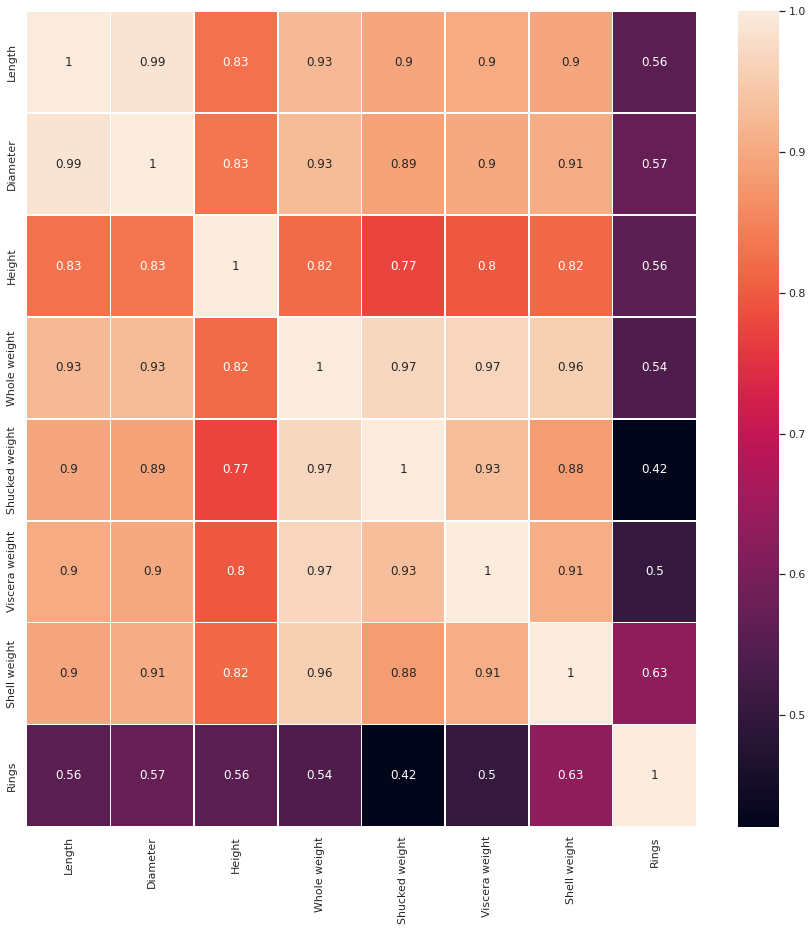

In [57]:
f, ax = plt.subplots(figsize=(15, 15))

correlation_mat = df.corr()
 
sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );

In [58]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 455.4+ KB


In [60]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

# **Filtrado de Datos**

In [61]:
# Filtrado de DataFrame

#Condiciones
#filtro_datos_1 = df['Campo1'] == '<CONDICICION>'
#filtro_datos_2 = df['Campo1'] == '<CONDICICION>'

#Filtro final con las condiciones
#filtro_final = ( filtro_datos_1 & filtro_datos_1 )

#df_valores = df[filtro_final] 

df_valores = df.copy()
df_valores

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [62]:
df_valores['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

**Cambiar los campos tipo fecha a Numeros , los modelos siempre tabrajan mejor con números**

In [63]:
df_valores['Sex'] = df_valores.Sex.map({'M': 1,'F': 2, 'I': 3})
df_valores

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       1   0.455     0.365   0.095        0.5140          0.2245   
1       1   0.350     0.265   0.090        0.2255          0.0995   
2       2   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
4       3   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    2   0.565     0.450   0.165        0.8870          0.3700   
4173    1   0.590     0.440   0.135        0.9660          0.4390   
4174    1   0.600     0.475   0.205        1.1760          0.5255   
4175    2   0.625     0.485   0.150        1.0945          0.5310   
4176    1   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [64]:
#df_valores['Sex'] = df_valores['Sex'].map({'M': 0,'F': 1, 'I':2})
#df_valores

In [65]:
df_valores['Sex'].value_counts()

1    1528
3    1342
2    1307
Name: Sex, dtype: int64

# **Gráfico inicial**


In [66]:
# **Gráfico inicial**
#
GraficarHistogramaPloty(df, 'Sex', nbins = 5 );

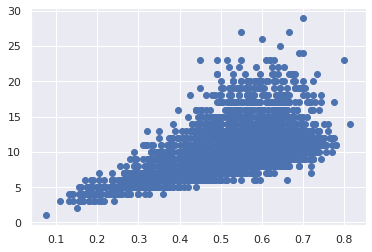

In [67]:
plt.scatter(df_valores['Length'], df_valores['Rings'], s = None, c = None, marker = None, cmap = None, vmin = None, vmax = None, alpha = None, linewidths = None, edgecolors = None)

In [68]:
#Sex	Length	Diameter	Height	Whole weight	Shucked weight	Viscera weight	Shell weight	Rings

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (8,8), dpi=1000)
sns.regplot(x='Length', y='Rings', data=df, ci=None, ax = axes[0,0], scatter_kws={'alpha':0.3});
sns.regplot(x='Diameter', y='Rings', data=df, ci=None, ax = axes[0,1], scatter_kws={'alpha':0.3});
sns.regplot(x='Height', y='Rings', data=df, ci=None, ax = axes[0,2], scatter_kws={'alpha':0.3});
sns.regplot(x='Whole weight', y='Rings', data=df, ci=None, ax = axes[1,0], scatter_kws={'alpha':0.3});
sns.regplot(x='Shucked weight', y='Rings', data=df, ci=None, ax = axes[1,1], scatter_kws={'alpha':0.3});
sns.regplot(x='Viscera weight', y='Rings', data=df, ci=None, ax = axes[1,2], scatter_kws={'alpha':0.3});
sns.regplot(x='Shell weight', y='Rings', data=df, ci=None, ax = axes[2,0], scatter_kws={'alpha':0.3});
fig.tight_layout();

# **Obtención de Datos X e y**

In [69]:
# Sex Length	Diameter	Height	'Whole weight'	'Shucked weight'	'Viscera weight' 'Shell weight' Rings
# values los deja como arreglo , pero se pueden usar los dataframe Directos

# Forma 1 cuando son pocas columnas para el loc
#X = df_valores.loc[:, ['campo1','campo2','campo3','campo4']]    #.values

# Forma 2 cuando debo eliminar pocas columnas y deben quedar muchas columnas en el data frame
X = df_valores.drop(columns=['Rings']) #.values 

# Forma 3 Parecido a parte 1 , en el loc se podría usar un filtro. Ojo
#X = df_valores[['campo1','campo2','campo3','campo4']]  #.values

X

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       1   0.455     0.365   0.095        0.5140          0.2245   
1       1   0.350     0.265   0.090        0.2255          0.0995   
2       2   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
4       3   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    2   0.565     0.450   0.165        0.8870          0.3700   
4173    1   0.590     0.440   0.135        0.9660          0.4390   
4174    1   0.600     0.475   0.205        1.1760          0.5255   
4175    2   0.625     0.485   0.150        1.0945          0.5310   
4176    1   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550  
4             0.0395        0.0550  
...              ...           ...  
4172          0.2390        0.2490  
4173          0.2145        0.2605  
4174          0.2875        0.3080  
4175          0.2610        0.2960  
4176          0.3765        0.4950  

[4177 rows x 8 columns]

In [70]:
X.shape

(4177, 8)

In [71]:
y = df_valores[['Rings']]
y

Rings
0        15
1         7
2         9
3        10
4         7
...     ...
4172     11
4173     10
4174      9
4175     10
4176     12

[4177 rows x 1 columns]

In [72]:
y.shape

(4177, 1)

# **Aplicación del Algún método**


# **Aplicación de Regresión Líneal**

In [101]:
y_pred , y_predX, X_test, y_test, score = MetodoLinearRegression(X,y,True,True)

Dividiendo Datos True

 score         = 53.86 

 fit_intercept = True
 coef_         = [[ -0.36864678   0.28451816  11.12021957  10.50092448  10.02884335
  -21.78774442 -10.2932187    7.91481102]]
 intercept     = [4.0152151]
 r2            = 0.5245215536480999 



# **Gráfico para representar el porcentaje de datos de la predicción al 53.86% , utilizando "División entrenar probar"**

el parametro it_intercept es **verdadero**

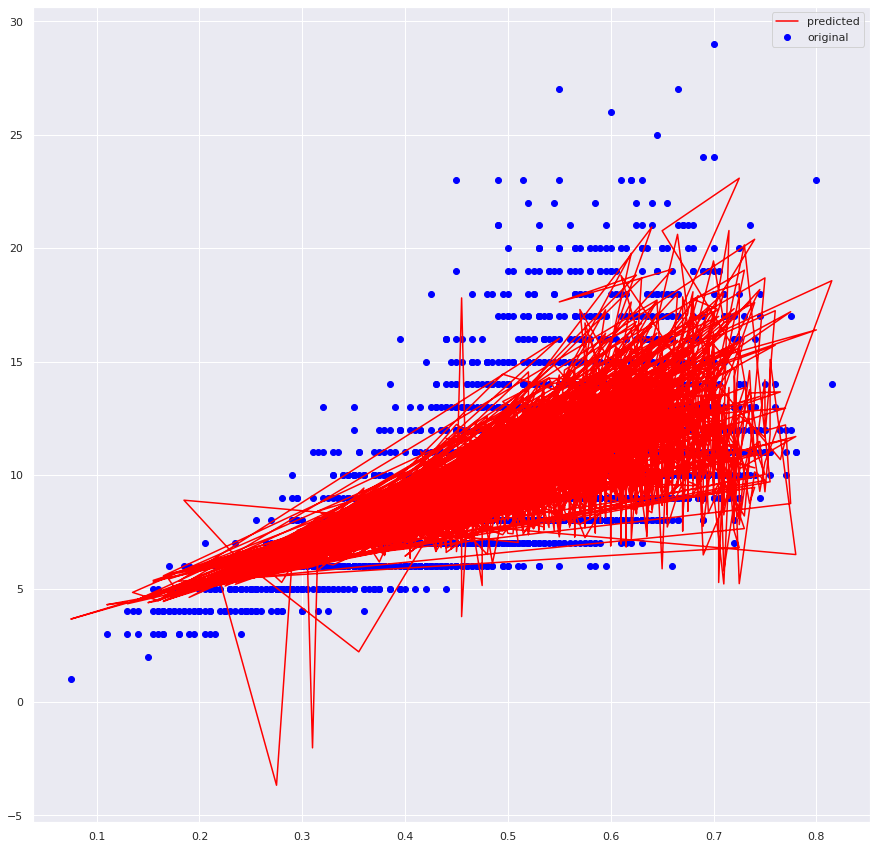

In [102]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [103]:
#def MetodoLinearRegression(X,y, fit_intercept = False, divideDatosEntreno = True):

y_pred , y_predX, X_test, y_test, score = MetodoLinearRegression(X,y,True,False)

Sin Dividir Datos False

 score         = 53.53 

 fit_intercept = True
 coef_         = [[ -0.3884832   -0.82639908  11.96403178  11.20449196   9.07020864
  -20.10614364 -10.15510106   8.70110596]]
 intercept     = [4.14774756]
 r2            = 0.5353445764938825 



# **Gráfico para representar el porcentaje de datos de la predicción al 53.53% , sin utilizar "División entrenar probar"**

el parametro it_intercept es **verdadero**

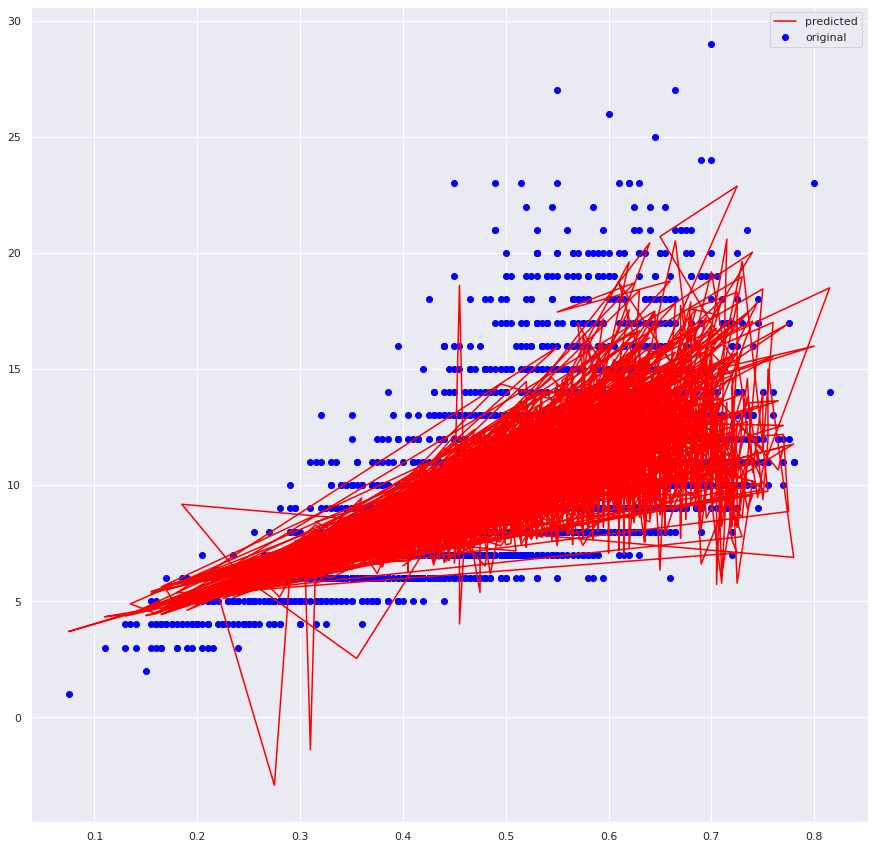

In [104]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [105]:
y_pred , y_predX, X_test, y_test, score = MetodoLinearRegression(X,y,False,True)

Dividiendo Datos True

 score         = 51.9 

 fit_intercept = False
 coef_         = [[ -0.09533137   8.39921868  11.74300329  13.4089783    9.73488875
  -22.94036846 -12.16959757   5.86519718]]
 intercept     = 0.0
 r2            = 0.4993841191317896 



# **Gráfico para representar el porcentaje de datos de la predicción al 51.9% , utilizando "División entrenar probar"**

el parametro it_intercept es **Falso**

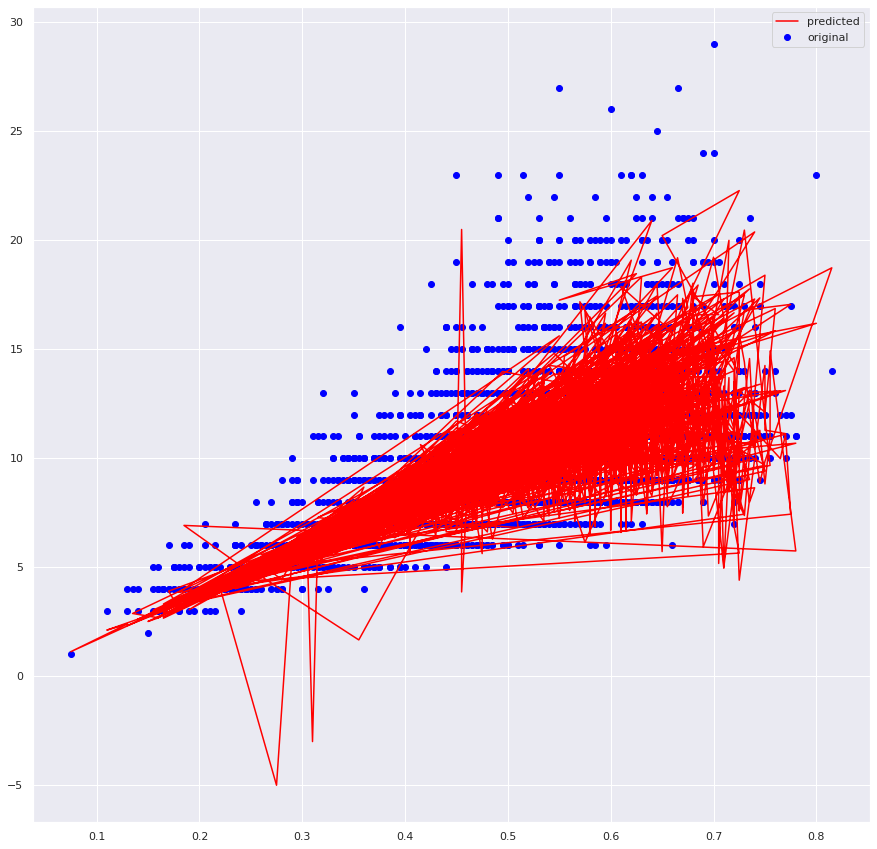

In [106]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [107]:
y_pred , y_predX, X_test, y_test, score = MetodoLinearRegression(X,y,False,False)

Sin Dividir Datos False

 score         = 51.42 

 fit_intercept = False
 coef_         = [[ -0.09033082   7.1329695   12.92884736  14.61503969   8.7573378
  -21.22765678 -11.96028156   6.44057868]]
 intercept     = 0.0
 r2            = 0.5142210719204893 



# **Gráfico para representar el porcentaje de datos de la predicción al 51.42%, sin utilizar  "División entrenar probar"**

el parametro it_intercept es **Falso**

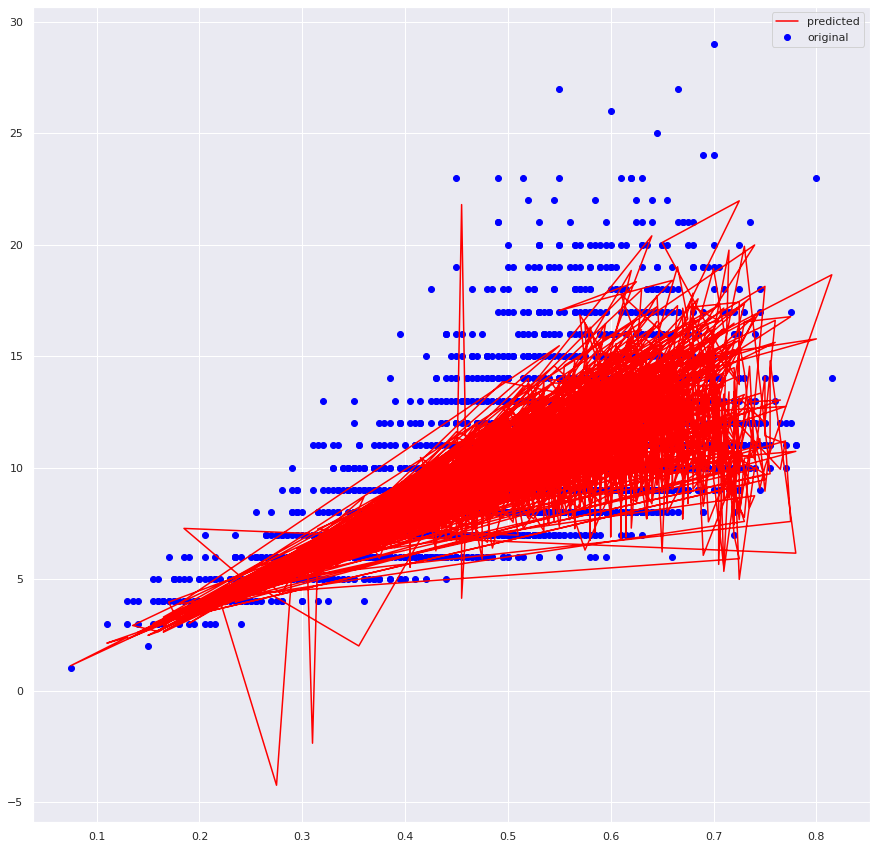

In [108]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

# **Método KNNRegresion utilizando "División entrenar probar"**

In [109]:
score_aux       = 0.0
n_neighbors_aux = 0.0

for n_neighbors in range(1,30,1):
  y_pred , y_predX, X_test, y_test, score = MetodoKNNRegresion(X , y ,n_neighbors , True)
  if score > score_aux:
    score_aux     = score
    n_neighbors_aux = n_neighbors



Dividiendo Datos True

 score       = 22.0    

 n_neighbors = 1
Dividiendo Datos True

 score       = 42.0    

 n_neighbors = 2
Dividiendo Datos True

 score       = 48.0    

 n_neighbors = 3
Dividiendo Datos True

 score       = 50.0    

 n_neighbors = 4
Dividiendo Datos True

 score       = 52.0    

 n_neighbors = 5
Dividiendo Datos True

 score       = 53.0    

 n_neighbors = 6
Dividiendo Datos True

 score       = 53.0    

 n_neighbors = 7
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 8
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 9
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 10
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 11
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 12
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 13
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 14
Dividiendo Datos True

 score       = 54.0    

 n_neighbors = 15
Dividiendo Datos Tr

In [110]:
score_aux, n_neighbors_aux

(55.00000000000001, 18)

# **Gráfico Método KNNRegresion con score al 55.00%  con n_neighbors = 18 , con utilizando "División entrenar probar"**

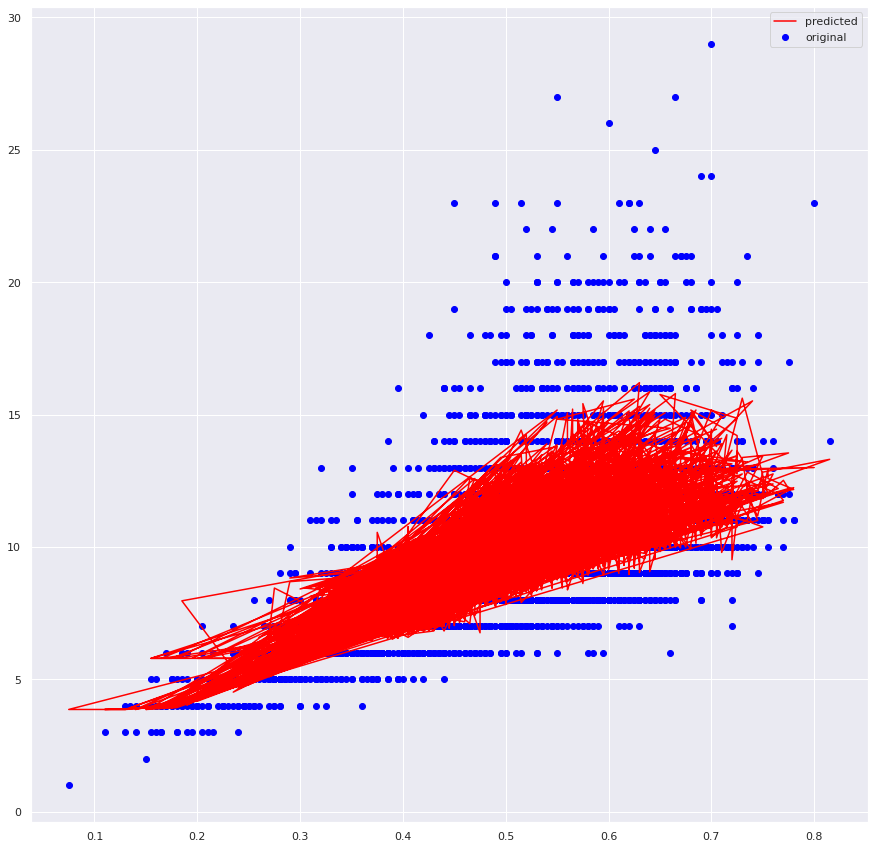

In [111]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

# **Método KNNRegresion sin utilizar "División entrenar probar"**

In [112]:
score_aux       = 0.0
n_neighbors_aux = 0.0

for n_neighbors in range(1,30,1):
  y_pred , y_predX, X_test, y_test, score = MetodoKNNRegresion(X , y ,n_neighbors , False)
  if score > score_aux:
    score_aux     = score
    n_neighbors_aux = n_neighbors



Sin Dividir Datos False

 score       = 100.0    

 n_neighbors = 1
Sin Dividir Datos False

 score       = 81.0    

 n_neighbors = 2
Sin Dividir Datos False

 score       = 74.0    

 n_neighbors = 3
Sin Dividir Datos False

 score       = 70.0    

 n_neighbors = 4
Sin Dividir Datos False

 score       = 68.0    

 n_neighbors = 5
Sin Dividir Datos False

 score       = 66.0    

 n_neighbors = 6
Sin Dividir Datos False

 score       = 65.0    

 n_neighbors = 7
Sin Dividir Datos False

 score       = 64.0    

 n_neighbors = 8
Sin Dividir Datos False

 score       = 64.0    

 n_neighbors = 9
Sin Dividir Datos False

 score       = 63.0    

 n_neighbors = 10
Sin Dividir Datos False

 score       = 62.0    

 n_neighbors = 11
Sin Dividir Datos False

 score       = 61.0    

 n_neighbors = 12
Sin Dividir Datos False

 score       = 61.0    

 n_neighbors = 13
Sin Dividir Datos False

 score       = 60.0    

 n_neighbors = 14
Sin Dividir Datos False

 score       = 60.0    

 n_nei

In [113]:
score_aux, n_neighbors_aux

(100.0, 1)

In [114]:
y_pred , y_predX, X_test, y_test, score  = MetodoKNNRegresion(X , y ,n_neighbors_aux, True)
score , n_neighbors_aux

Dividiendo Datos True

 score       = 22.0    

 n_neighbors = 1


(22.0, 1)

# **Gráfico Método KNNRegresion con score al 22.00%  con n_neighbors = 1,  utilizando "División entrenar probar"**

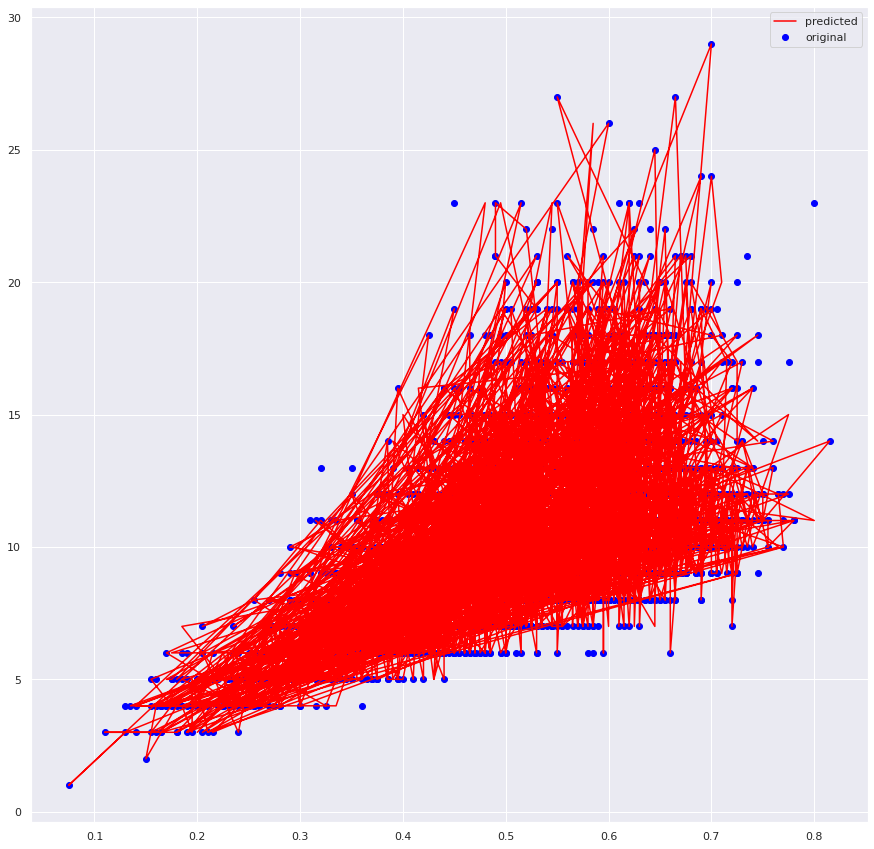

In [115]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [116]:
y_pred , y_predX, X_test, y_test, score  = MetodoKNNRegresion(X , y ,n_neighbors_aux, False)
score , n_neighbors_aux

Sin Dividir Datos False

 score       = 100.0    

 n_neighbors = 1


(100.0, 1)

# **Método KNNRegresion con score al 100.00%  con n_neighbors = 1 , sin utilizar "División entrenar probar"**

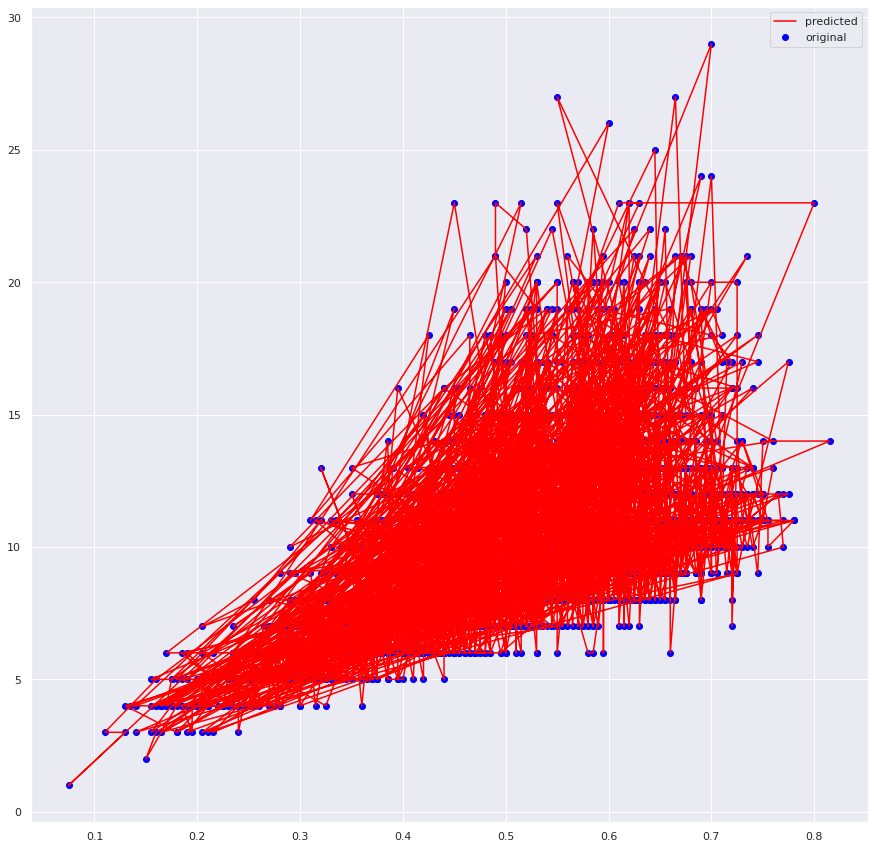

In [117]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

# **Conclusiones y Respuestas**

1.   ¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?


> **KNN fue el mejor método para ejecutar sin división entrenar probar, aunqué fue un 550.0% contra el 53.86% de regresión Líneal**

2.   ¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?

> **Si bien KNN dió un mejor score , 55% frente al 53.86% de regresión lineal, este último mejoró su score al usar división entrenar probar**

3.   ¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?

> **Como se definieron unas funciones hubo mucho más código que agregar**

4.   ¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?

> **Se realizarón gráficos para mostrar las diferencias de cada método**

5.   ¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?

> **Knn logró un score del 100% , no se puede mejorar más que eso en este caso, pero la cantidad de Datos no era de gran tamaño**

# **Datos finales**

## **Regresión Lineal**

**el parametro it_intercept es Verdadero**

Gráfico para representar el porcentaje de datos de la predicción al **53.86%** , utilizando   "División entrenar probar"

Gráfico para representar el porcentaje de datos de la predicción al **53.53%** , sin utilizar "División entrenar probar"

**el parametro it_intercept es Falso**

Gráfico para representar el porcentaje de datos de la predicción al **51.90%** , utilizando   "División entrenar probar"
Gráfico para representar el porcentaje de datos de la predicción al **51.42%** , sin utilizar "División entrenar probar"

## **KNN**

Método KNNRegresion con score al **55.00%** con n_neighbors = 18 , con utilizando "División entrenar probar"

Método KNNRegresion con score al **100.00%** con n_neighbors = 1 , sin utilizar   "División entrenar probar